In [91]:
import pandas as pd

In [92]:
data = pd.read_excel(r'C:\Users\Akash Sharma\Downloads\SampleSuperstorei.xlsx')

In [93]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Bookcases,Chairs,Tables,Furnishings,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,1,0,0,0,261.9600,2,0,65.490000
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,0,1,0,0,731.9400,3,0,182.985000
2,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,0,0,1,0,957.5775,5,45,239.394375
3,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,0,0,0,1,48.8600,7,0,17.000000
4,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,0,0,1,0,1706.1840,9,20,426.546000


In [94]:
data.describe()

,Postal Code,Bookcases,Chairs,Tables,Furnishings,Sales,Quantity,Discount,Profit
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,52844.779116,0.092369,0.285141,0.164659,0.457831,391.117068,3.899598,16.959839,105.747688
std,31294.697804,0.290130,0.452391,0.371619,0.499222,490.115006,2.444950,17.574679,133.575769
min,1841.000000,0.000000,0.000000,0.000000,0.000000,2.328000,1.000000,0.000000,0.582000
25%,22153.000000,0.000000,0.000000,0.000000,0.000000,53.340000,2.000000,0.000000,17.000000
50%,48227.000000,0.000000,0.000000,0.000000,0.000000,207.846000,3.000000,20.000000,53.278750
75%,84057.000000,0.000000,1.000000,0.000000,1.000000,542.646000,5.000000,20.000000,141.780000
max,98661.000000,1.000000,1.000000,1.000000,1.000000,3083.430000,14.000000,60.000000,894.194700


In [95]:
predictors = ['Chairs', 'Tables', 'Bookcases', 'Furnishings','Sales']
outcome = ['Profit']

In [96]:
x = data[predictors]
x

,Chairs,Tables,Bookcases,Furnishings,Sales
0,0,0,1,0,261.9600
1,1,0,0,0,731.9400
2,0,1,0,0,957.5775
3,0,0,0,1,48.8600
4,0,1,0,0,1706.1840
...,...,...,...,...,...
244,0,0,0,1,15.7120
245,0,0,0,1,55.9680
246,1,0,0,0,95.9840
247,1,0,0,0,544.0080


In [97]:
y = data[outcome]
y

,Profit
0,65.490000
1,182.985000
2,239.394375
3,17.000000
4,426.546000
...,...
244,3.928000
245,13.992000
246,23.996000
247,136.002000


In [98]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

In [99]:
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [100]:
from dmba import regressionSummary, exhaustive_search

In [101]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)

In [102]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import matplotlib.pylab as plt


In [103]:
data_lm = LinearRegression()
data_lm.fit(train_x, train_y)

LinearRegression()

In [104]:
print('intercept ', data_lm.intercept_)
print(pd.DataFrame({'Predictor': [x.columns], 'coefficient': [data_lm.coef_]}))

intercept  [4.74800593]
                                           Predictor  \
0  Index(['Chairs', 'Tables', 'Bookcases', 'Furni...   

                                         coefficient  
0  [[-4.104091126785262, 0.11749607032220949, 6.3...  


In [105]:
data_lm.coef_

array([[-4.10409113,  0.11749607,  6.33255204, -2.34595698,  0.26285712]])

In [106]:
regressionSummary(train_y, data_lm.predict(train_x))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 35.8952
            Mean Absolute Error (MAE) : 14.6290
          Mean Percentage Error (MPE) : -18.8745
Mean Absolute Percentage Error (MAPE) : 27.3923


In [107]:

pred_y = data_lm.predict(train_x)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, data_lm))
print('AIC : ', AIC_score(train_y, pred_y, data_lm))
print('BIC : ', BIC_score(train_y, pred_y, data_lm))

adjusted r2 :  0.9279427288386902
AIC :  1995.8178969702353
BIC :  2005.697811444409


In [108]:

data_lm_pred = data_lm.predict(test_x)

# Compute common accuracy measures
regressionSummary(test_y, data_lm_pred)


Regression statistics

                      Mean Error (ME) : -0.8377
       Root Mean Squared Error (RMSE) : 29.0748
            Mean Absolute Error (MAE) : 10.9459
          Mean Percentage Error (MPE) : -25.8223
Mean Absolute Percentage Error (MAPE) : 30.6986


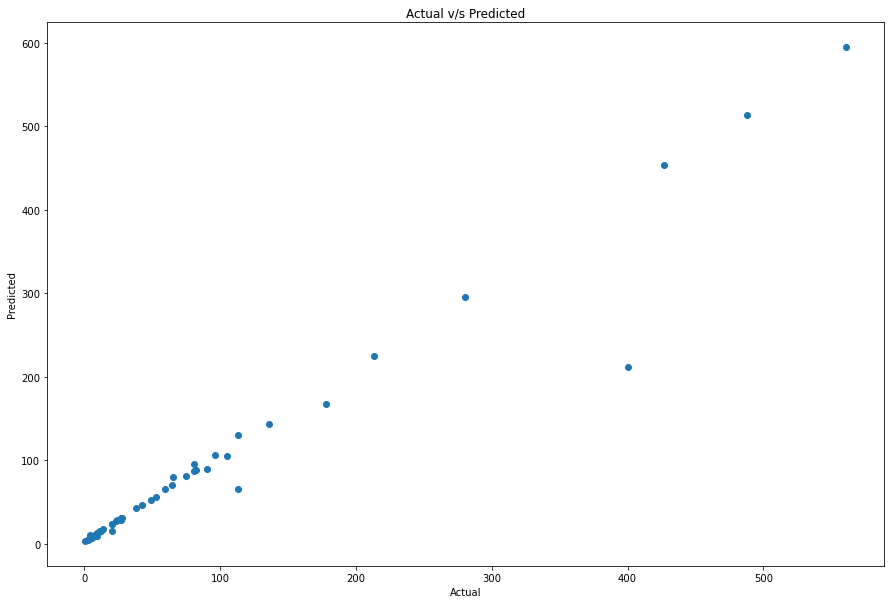

In [125]:
Predicted = data_lm_pred
Actual=test_y
plt.figure(figsize=(15,10))
plt.scatter(Actual,Predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')
plt.show()

In [109]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_x[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_x.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_x[variables]), model)
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

   n     r2adj          AIC  Bookcases  Chairs  Furnishings  Sales  Tables
0  1  0.927482  1997.086429      False   False        False   True   False
1  2  0.927829  1996.132118       True   False        False   True   False
2  3  0.927917  1995.889321       True   False        False   True    True
3  4  0.927943  1995.817897       True    True        False   True    True
4  5  0.927943  1995.817897       True    True         True   True    True


In [110]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = backward_elimination(train_x.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Chairs, Tables, Bookcases, Furnishings, Sales
Start: score=1995.82
Step: score=1995.82, remove Tables
Step: score=1995.82, remove None
['Chairs', 'Bookcases', 'Furnishings', 'Sales']


In [111]:
regressionSummary(test_y, best_model.predict(test_x[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.8377
       Root Mean Squared Error (RMSE) : 29.0748
            Mean Absolute Error (MAE) : 10.9459
          Mean Percentage Error (MPE) : -25.8223
Mean Absolute Percentage Error (MAPE) : 30.6986


In [112]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = forward_selection(train_x.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Chairs, Tables, Bookcases, Furnishings, Sales
Start: score=2518.25, constant
Step: score=1997.09, add Sales
Step: score=1996.13, add Bookcases
Step: score=1995.89, add Tables
Step: score=1995.82, add Chairs
Step: score=1995.82, add None
['Sales', 'Bookcases', 'Tables', 'Chairs']


In [113]:

best_model, best_variables = stepwise_selection(train_x.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Chairs, Tables, Bookcases, Furnishings, Sales
Start: score=2518.25, constant
Step: score=1997.09, add Sales
Step: score=1996.13, add Bookcases
Step: score=1995.89, add Tables
Step: score=1995.82, add Chairs
Step: score=1995.82, unchanged None
['Sales', 'Bookcases', 'Tables', 'Chairs']


# final model with best variables

In [114]:
data = pd.read_excel(r'C:\Users\Akash Sharma\Downloads\SampleSuperstorei.xlsx')

In [142]:
predictors = ['Sales', 'Bookcases', 'Tables', 'Chairs']
outcome = ['Profit']
x = data[predictors]
y = data[outcome]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)
data_lm = LinearRegression()
data_lm.fit(train_x, train_y)
pred_y = data_lm.predict(test_x)

In [143]:
#predicted value
pred_y

array([[  9.44661964],
       [225.21641686],
       [  6.07153428],
       [105.65490853],
       [  9.86719102],
       [ 30.89576023],
       [  5.59103147],
       [ 12.5483336 ],
       [ 14.08867629],
       [453.34810619],
       [ 31.17964592],
       [ 14.74056194],
       [ 15.00341905],
       [ 87.19712573],
       [ 88.55609702],
       [ 14.78787622],
       [ 10.65576237],
       [ 70.23811038],
       [ 14.76684765],
       [  6.60565994],
       [ 28.97255182],
       [ 27.08117778],
       [  3.16696316],
       [ 96.01915474],
       [ 11.47167085],
       [295.45604375],
       [ 17.11363597],
       [594.84303985],
       [ 90.05318539],
       [ 46.68401   ],
       [ 51.86109798],
       [130.01025973],
       [ 81.36853206],
       [ 42.28273046],
       [ 23.40958959],
       [ 10.80927092],
       [104.94614382],
       [ 65.10924234],
       [ 27.90970341],
       [143.64028831],
       [  8.73690543],
       [  4.95386582],
       [  5.6141629 ],
       [ 65

In [138]:
#Actual values
test_y.values

array([[  9.38   ],
       [213.588  ],
       [  3.49   ],
       [ 95.8595 ],
       [  4.     ],
       [ 27.1    ],
       [  3.033  ],
       [  9.65   ],
       [ 11.115  ],
       [426.546  ],
       [ 27.37   ],
       [ 11.735  ],
       [ 11.985  ],
       [ 80.6475 ],
       [ 81.94   ],
       [ 20.     ],
       [  8.89   ],
       [ 64.518  ],
       [ 11.76   ],
       [  5.5972 ],
       [ 26.943  ],
       [ 23.472  ],
       [  0.7275 ],
       [ 80.784  ],
       [  8.626  ],
       [280.392  ],
       [ 13.992  ],
       [561.12   ],
       [ 90.13816],
       [ 42.116  ],
       [ 48.712  ],
       [113.1125 ],
       [ 75.104  ],
       [ 37.93   ],
       [ 19.98   ],
       [  7.996  ],
       [105.15253],
       [ 59.64   ],
       [ 24.26   ],
       [136.002  ],
       [  6.025  ],
       [  2.427  ],
       [  3.055  ],
       [112.93304],
       [ 20.7    ],
       [400.     ],
       [487.96   ],
       [ 53.0145 ],
       [177.8976 ],
       [ 65.49   ]])

In [145]:
from sklearn.metrics import r2_score
r2_score(test_y.values,pred_y)

0.9484350052773611

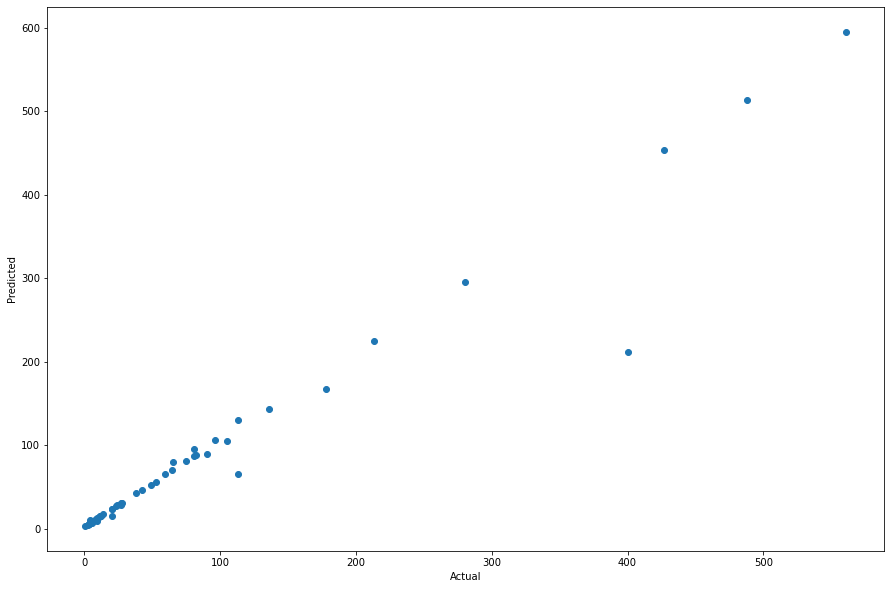

In [147]:
plt.figure(figsize=(15,10))
plt.scatter(test_y.values,pred_y)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [162]:
#checking prediction for new variable

In [165]:
new_sale = pd.DataFrame([{'Chairs':0, 'Tables':1, 'Bookcases':0,'Sales':5551}])
new_sale

,Chairs,Tables,Bookcases,Sales
0,0,1,0,5551


In [166]:
print('profit:',data_lm.predict(new_sale))

profit: [[-9748.32208432]]
